# Yearly Comparison of Demand for NSW; An Automated NEM Data Analysis

In this notebook we will automate zipped data retrieving from NEMWEB and gain some insight on demand changes across 2010, 2016 and 2022 for all 12 months in NSW

In [1]:
import pandas as pd
import urllib.request
import zipfile
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
# Assign the year (Other years will be based of this year)
year = '2022'
# steps to previous years
year_step = 6
# Identify the table to download
data = 'DISPATCHREGIONSUM'
state = 'NSW1'
Month = [format(i, '02d') for i in range(1, 13)]
col_demand = ['SETTLEMENTDATE','REGIONID','TOTALDEMAND','INTERVENTION']

In [3]:
# Function to download and extract data from website for a chosen state and year over its 12 months and appends them
def data_extract (year,data,state,Month,col_demand):
    
    demand = pd.DataFrame()
    
    for month in Month:
        #print(month)
        url = f'https://nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/{year}/MMSDM_{year}_{month}/MMSDM_Historical_Data_SQLLoader/DATA/PUBLIC_DVD_{data}_{year}{month}010000.zip'
        file_name = f'{year}{month}010000.zip'
        urllib.request.urlretrieve(url, file_name)
    
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall()
        df = pd.read_csv(f'PUBLIC_DVD_{data}_{year}{month}010000.csv', engine='python',skiprows=1, skipfooter=1)
        df = df[df['REGIONID']== state]
        df = df[col_demand]
        df['month'] = month
        demand = demand.append(df)
    return demand

In [11]:
# call the function for given 3 years and calculate the total % of demand
yearly_demand = pd.DataFrame()
for i in range(3):
    print(i)
    year = int(year)
    demand = data_extract (year,data,state,Month,col_demand)
    demand_copy = demand.copy()
    demand = demand[demand['INTERVENTION']== 0]
    demand['SETTLEMENTDATE'] = pd.to_datetime(demand['SETTLEMENTDATE'])
    month_demand = demand.groupby('month').sum()
    month_demand.reset_index(inplace = True)
    month_demand['perc_demand'] = (month_demand['TOTALDEMAND']/month_demand.TOTALDEMAND.sum())*100
    month_demand['year'] = year
    yearly_demand = yearly_demand.append(month_demand)
    year = int(year) - year_step

0
1
2


In [12]:
# yearly_demand shows the total demand based on month 
print(yearly_demand)

,month,TOTALDEMAND,INTERVENTION,perc_demand,year
0,01,6.806629e+07,0,8.510414,2022
1,02,6.071332e+07,0,7.591063,2022
2,03,6.563029e+07,0,8.205837,2022
3,04,6.104447e+07,0,7.632467,2022
4,05,6.972846e+07,0,8.718237,2022
5,06,7.638588e+07,0,9.550622,2022
6,07,7.950802e+07,0,9.940988,2022
7,08,7.364217e+07,0,9.207572,2022
8,09,6.493930e+07,0,8.119441,2022
9,10,6.296433e+07,0,7.872509,2022


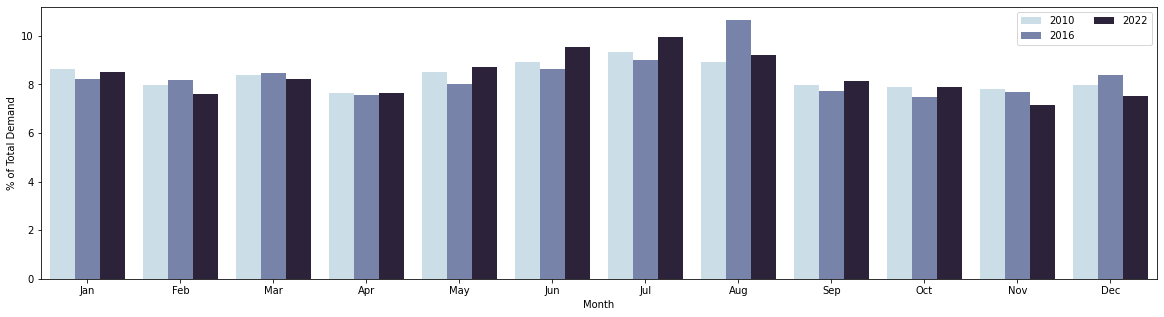

In [13]:
# How does the demand (as a measure of % of total yearly demand) of spread out across 12 months in different years
categories_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots(figsize=(20, 5))
sb.barplot(data = yearly_demand, x= "month", y= "perc_demand", hue = "year",palette ="ch:s=.25,rot=-.25")
ax.set_ylabel('% of Total Demand')
ax.set_xlabel('Month')
ax.set_xticklabels(categories_list)
plt.legend(loc="upper right", ncol= 2)
plt.show()

<ipython-input-22-d3e9fad0580e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_list)


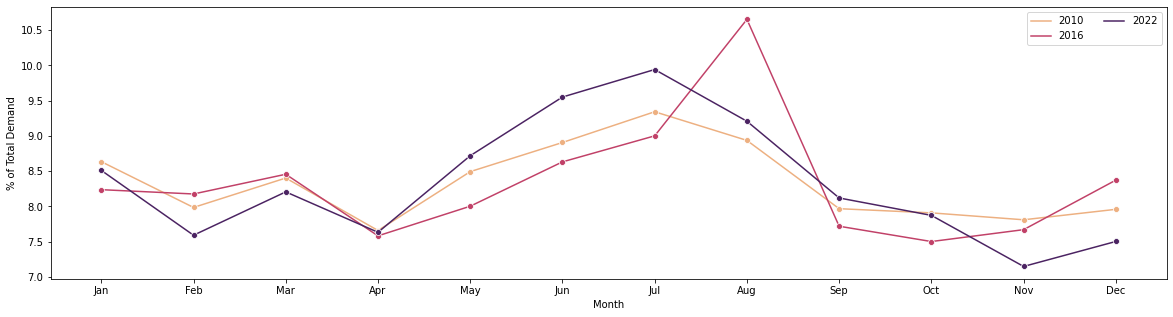

In [22]:
# lets show it another way 
categories_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots(figsize=(20, 5))
sb.lineplot(data = yearly_demand, x= "month", y= "perc_demand", hue = "year", marker='o',palette = "flare")
ax.set_ylabel('% of Total Demand')
ax.set_xlabel('Month')
ax.set_xticklabels(categories_list)
plt.legend(loc="upper right", ncol= 2)
plt.show()

In [18]:
# The toal demand over years 
yearly_demand.groupby('year').sum()

,TOTALDEMAND,INTERVENTION,perc_demand
year,,,
2010,9.258114e+08,0,100.0
2016,8.567212e+08,0,100.0
2022,7.998001e+08,0,100.0


Based on the data from the Australian Bureau of Statistics, the population of New South Wales in June 2010 was approximately 7.24 million. As of 2021, the estimated population of New South Wales is around 8.14 million. So, what factors have reduced the demand in NSW over years?